In [1]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import FunctionTransformer, StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the California housing dataset
X, y = fetch_california_housing(return_X_y=True)

In [3]:
# Creating a Function to present Feature Information (Descriptive Statistics)

def feature_info(feature_index: int = None):
    print(f'Number of observations in the Feature: {X[:, feature_index].shape[0]}')
    print(f'Data type of the Feature: {X[:, feature_index].dtype}')
    print(f'Maximum value: {np.max(X[:, feature_index]):.2f}')
    print(f'Minimum value: {np.min(X[:, feature_index]):.2f}')
    print(f'Mean: {np.mean(X[:, feature_index]):.2f}')
    print(f'Median: {np.median(X[:, feature_index]):.2f}')
    print(f'Standard Deviation: {np.std(X[:, feature_index]):.2f}')

In [4]:
# Creating a Function to plot the Feature

def plot_feature(feature: np.ndarray = None, feature_number: int = None):
    
    color_list = ['wheat', 'royalblue', 'indianred', 'olive', 'mediumpurple', 'tan', 'dimgrey', 'teal']
    
    plt.figure(figsize=(14, 3), facecolor='lightgray')

    plt.subplot(1, 2, 1)
    plt.hist(x=feature, bins=35, color=color_list[feature_number], edgecolor='black', alpha=0.8)
    #plt.axvline(x=np.mean(X[:, feature_number]), color='red', label=f'mean: {np.mean(X[:, feature_number])}')
    #plt.axvline(x=np.median(X[:, feature_number]), color='navy', label=f'median: {np.median(X[:, feature_number])}')
    plt.title('Distribution of the Feature', fontsize=9, fontweight='bold', color='midnightblue')
    plt.ylabel("Frequency", fontsize=9)
    plt.grid(visible=True, which='major', linestyle='--', alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.boxplot(x=feature, 
                vert=False, 
                meanline=True,
                patch_artist=True, 
                boxprops=dict(facecolor='lightgrey', color='black', linewidth=1.5, alpha=0.8), 
                whiskerprops=dict(color='black', linewidth=1.5), 
                capprops=dict(color='black', linewidth=1.5), 
                medianprops=dict(color='orange', linewidth=2),
                meanprops=dict(color='black', linewidth=2),
                flierprops=dict(markerfacecolor='gray', marker='o', markersize=6)
                )
    plt.title("Boxplot of the Feature", fontsize=9, fontweight='bold', color='midnightblue') 
    plt.xlabel("Value", fontsize=9)
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.suptitle(f'Feature {feature_number}', fontsize=10, fontweight='bold')
    plt.tight_layout()
    plt.show()

In [5]:
# Creating a Function to plot the Normalized \ Transformed Feature

def plot_normalized_feature(normalized_feature: np.ndarray = None, feature_number: int = None):
    
    color_list = ['wheat', 'royalblue', 'indianred', 'olive', 'mediumpurple', 'tan', 'dimgrey', 'teal']
        
    plt.figure(figsize=(14, 3), facecolor='lightgray')

    plt.subplot(1, 2, 1)
    plt.hist(x=normalized_feature, bins=35, color=color_list[feature_number], edgecolor='black', alpha=0.7)
    plt.title('Distribution of the Normalized Feature', fontsize=9, fontweight='bold', color='midnightblue')
    plt.xlabel("Value", fontsize=9)
    plt.ylabel("Frequency", fontsize=9)
    plt.grid(visible=True, which='major', linestyle='--', alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.boxplot(x=normalized_feature, 
                vert=False, 
                patch_artist=True, 
                boxprops=dict(facecolor='lightgrey', color='black', linewidth=1.5, alpha=0.7), 
                whiskerprops=dict(color='black', linewidth=1.5), 
                capprops=dict(color='black', linewidth=1.5), 
                medianprops=dict(color='orange', linewidth=2),
                flierprops=dict(markerfacecolor='gray', marker='o', markersize=6)
                )
    plt.title("Boxplot of the Normalized Feature", fontsize=9, fontweight='bold', color='midnightblue') 
    plt.xlabel("Value", fontsize=9)
    plt.grid(True, linestyle='--', alpha=0.5)


    plt.suptitle(f'Normalized Feature {feature_number}', fontsize=10, fontweight='bold')
    plt.tight_layout()
    plt.show()


In [6]:
# Information about the Variables in the Dataset (Descriptive Statistics)
print(f'Number of observations in the dataset: {X.shape[0]}')
print(f'Number of Features (Predictors)  the dataset: {X.shape[1]}')

Number of observations in the dataset: 20640
Number of Features (Predictors)  the dataset: 8


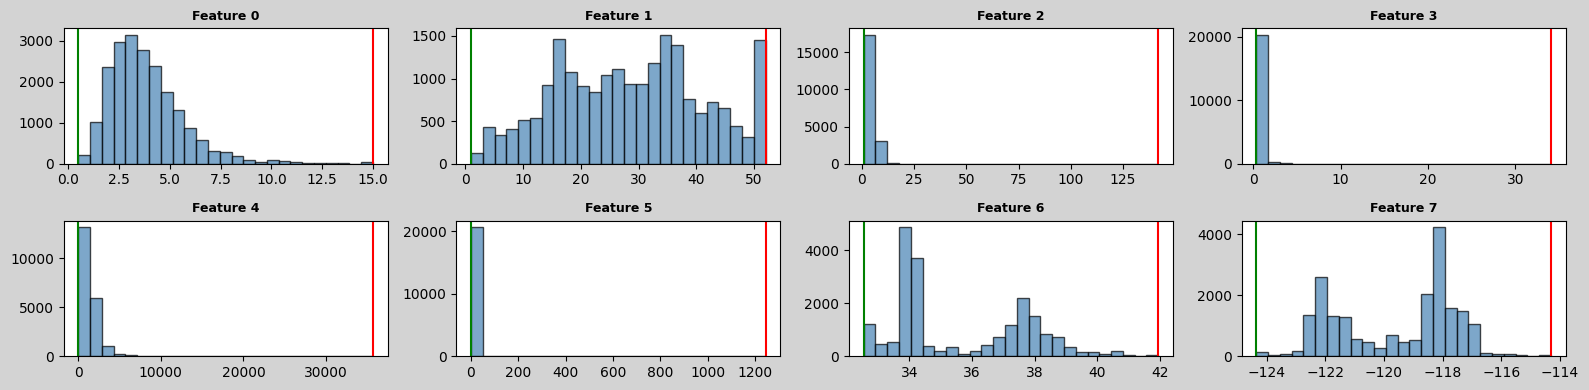

In [7]:
# Plotting the Features in the Dataset 
fig, axes = plt.subplots(nrows=2, ncols=4)
fig.set_figheight(4)
fig.set_figwidth(16)
fig.set_facecolor('lightgray')

p = 0
for j in range(2):
    for i in range(4):
        axes[j, i].hist(X[:, p], bins=25, color='steelblue', edgecolor='black', alpha=0.7)
        axes[j, i].axvline(np.max(X[:, p]), color='red', linestyle='-', label='max')
        axes[j, i].axvline(np.min(X[:, p]), color='green', linestyle='-', label='min')
        axes[j, i].set_title(f'Feature {p}', fontsize=9, fontweight='bold')
        p +=1

plt.tight_layout()
plt.show()

##### **Feature 0**

In [8]:
n = 0
feature_info(feature_index=n)

Number of observations in the Feature: 20640
Data type of the Feature: float64
Maximum value: 15.00
Minimum value: 0.50
Mean: 3.87
Median: 3.53
Standard Deviation: 1.90


In [9]:
# Apply log(x + 1) transformation
log_transformer = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)
feature_log_transformed = log_transformer.transform(X[:, n].reshape(-1, 1))

# Standardize the feature
standardize = StandardScaler()
feature_standardized = standardize.fit_transform(feature_log_transformed)

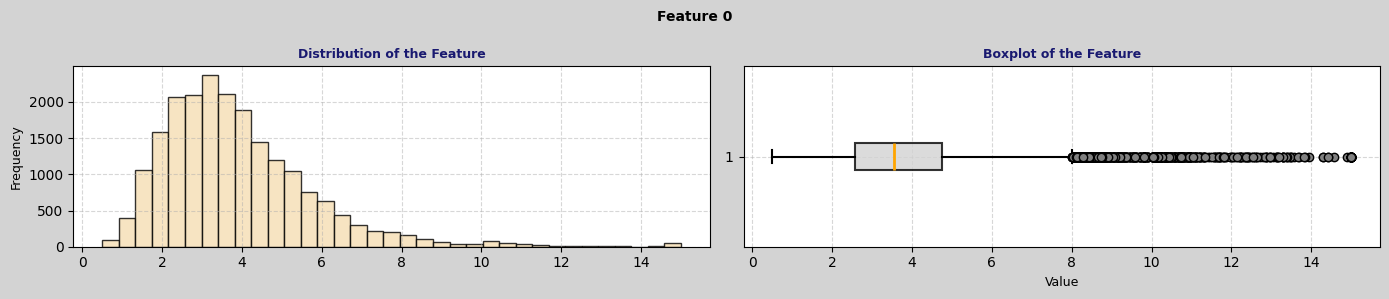

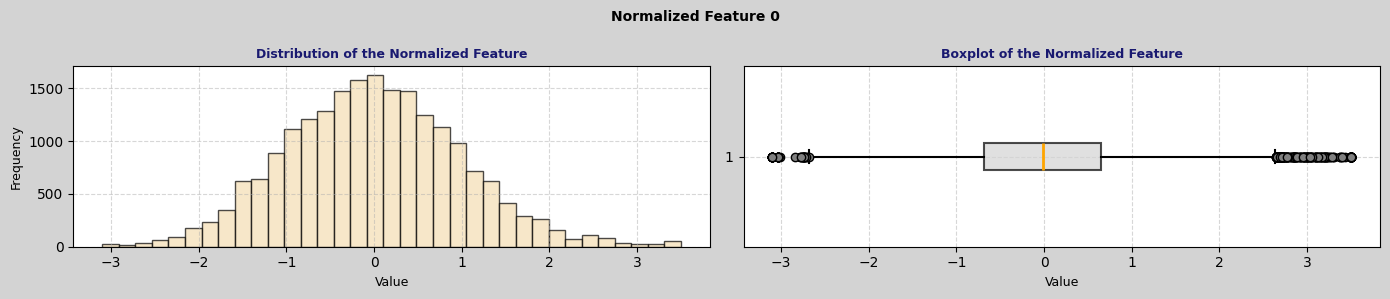

In [10]:
# Plotting the Feature before Normalization
plot_feature(feature=X[:, n], feature_number=n)
# Plotting the Feature after Log Transformation and Standardization
plot_normalized_feature(normalized_feature=feature_standardized, feature_number=n)

##### **Feature 1**

In [11]:
n = 1
feature_info(feature_index=n)

Number of observations in the Feature: 20640
Data type of the Feature: float64
Maximum value: 52.00
Minimum value: 1.00
Mean: 28.64
Median: 29.00
Standard Deviation: 12.59


In [12]:
# Standardize the feature
standardize = StandardScaler()
feature_standardized = standardize.fit_transform(X[:, n].reshape(-1, 1))

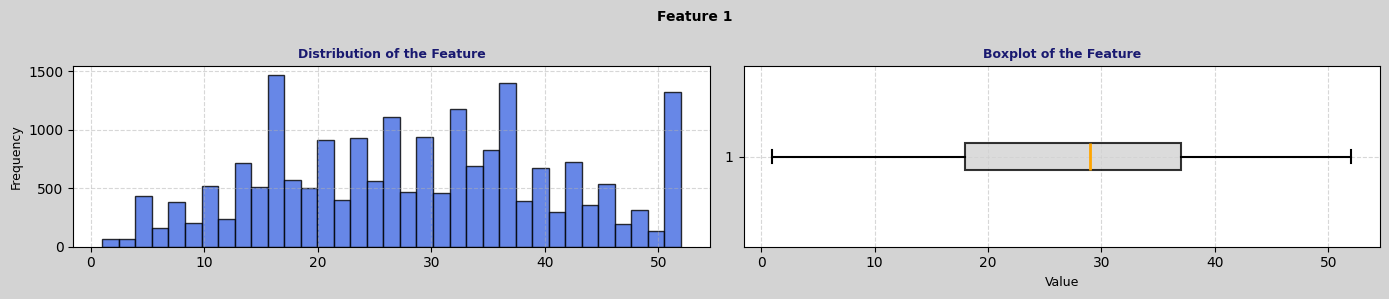

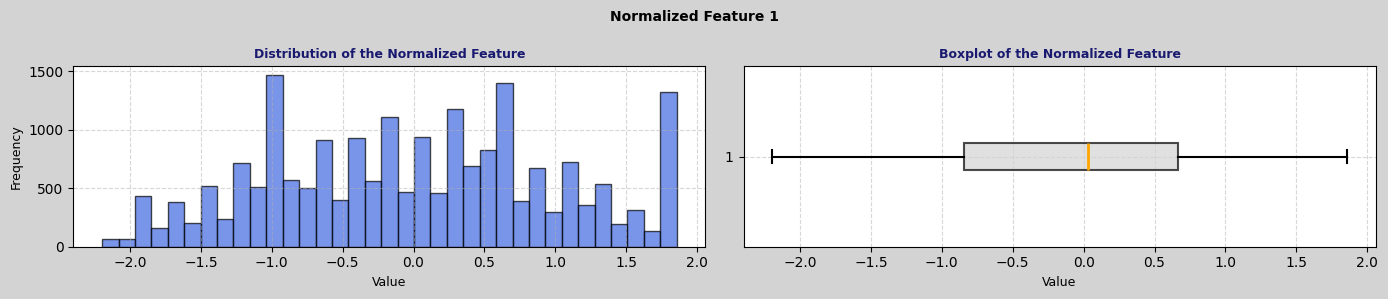

In [13]:
# Plotting the Feature before Normalization
plot_feature(feature=X[:, n], feature_number=n)
# Plotting the Feature after Log Transformation and Standardization
plot_normalized_feature(normalized_feature=feature_standardized, feature_number=n)

##### **Feature 2**

In [14]:
n = 2
feature_info(feature_index=n)

Number of observations in the Feature: 20640
Data type of the Feature: float64
Maximum value: 141.91
Minimum value: 0.85
Mean: 5.43
Median: 5.23
Standard Deviation: 2.47


In [15]:
# Apply log(x + 1) transformation
log_transformer = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)
feature_log_transformed = log_transformer.transform(X[:, n].reshape(-1, 1))

# Standardize the feature
standardize = StandardScaler()
feature_standardized = standardize.fit_transform(feature_log_transformed)

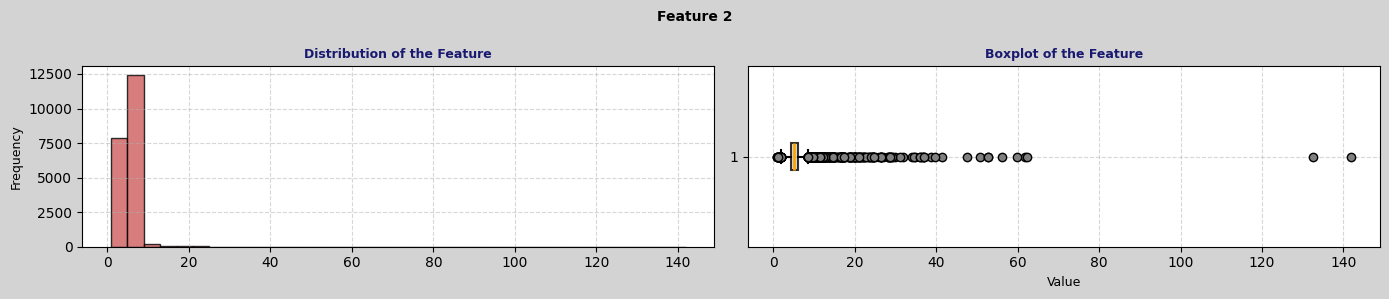

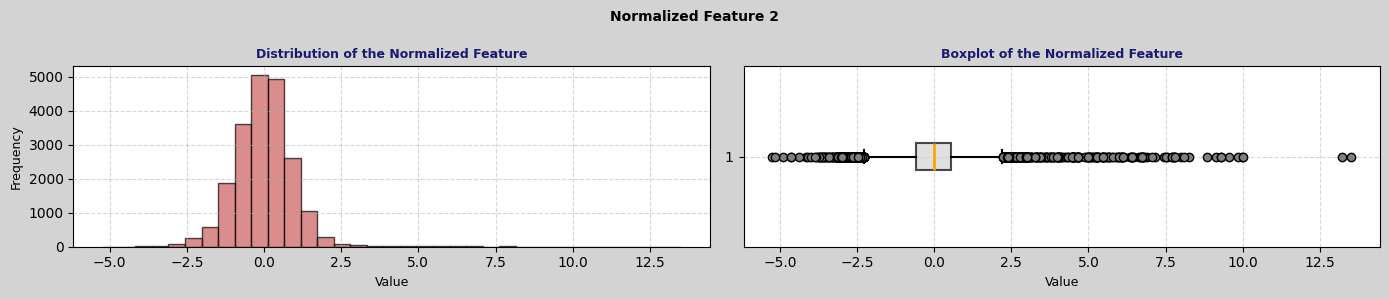

In [16]:
# Plotting the Feature before Normalization
plot_feature(feature=X[:, n], feature_number=n)
# Plotting the Feature after Log Transformation and Standardization
plot_normalized_feature(normalized_feature=feature_standardized, feature_number=n)

##### **Feature 3**

In [17]:
n = 3
feature_info(feature_index=n)

Number of observations in the Feature: 20640
Data type of the Feature: float64
Maximum value: 34.07
Minimum value: 0.33
Mean: 1.10
Median: 1.05
Standard Deviation: 0.47


In [18]:
# Apply log(x + 1) transformation
log_transformer = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)
feature_log_transformed = log_transformer.transform(X[:, n].reshape(-1, 1))

# Standardize the feature
standardize = StandardScaler()
feature_standardized = standardize.fit_transform(feature_log_transformed)

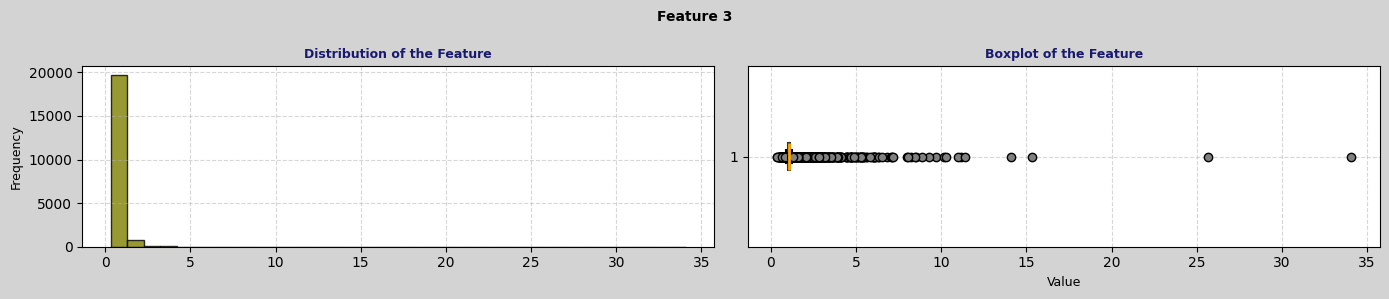

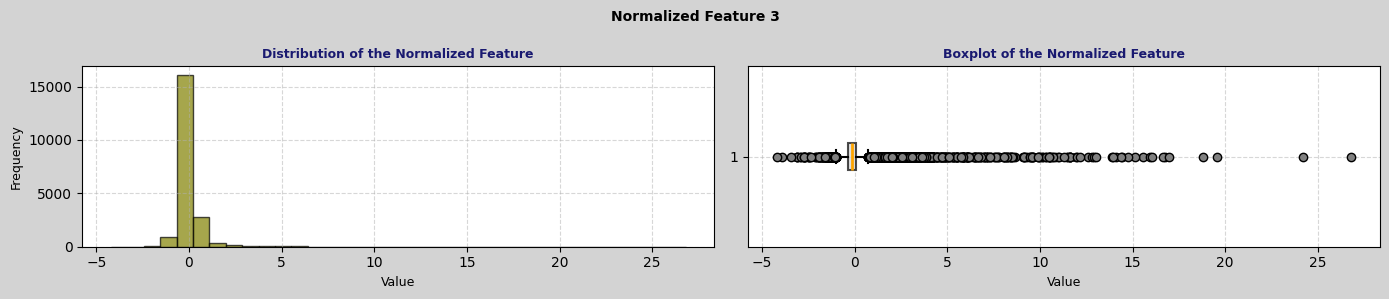

In [19]:
# Plotting the Feature before Normalization
plot_feature(feature=X[:, n], feature_number=n)
# Plotting the Feature after Log Transformation and Standardization
plot_normalized_feature(normalized_feature=feature_standardized, feature_number=n)

##### **Feature 4**

In [20]:
n = 4
feature_info(feature_index=n)

Number of observations in the Feature: 20640
Data type of the Feature: float64
Maximum value: 35682.00
Minimum value: 3.00
Mean: 1425.48
Median: 1166.00
Standard Deviation: 1132.43


In [21]:
# Apply log(x + 1) transformation
log_transformer = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)
feature_log_transformed = log_transformer.transform(X[:, n].reshape(-1, 1))

# Standardize the feature
standardize = StandardScaler()
feature_standardized = standardize.fit_transform(feature_log_transformed)

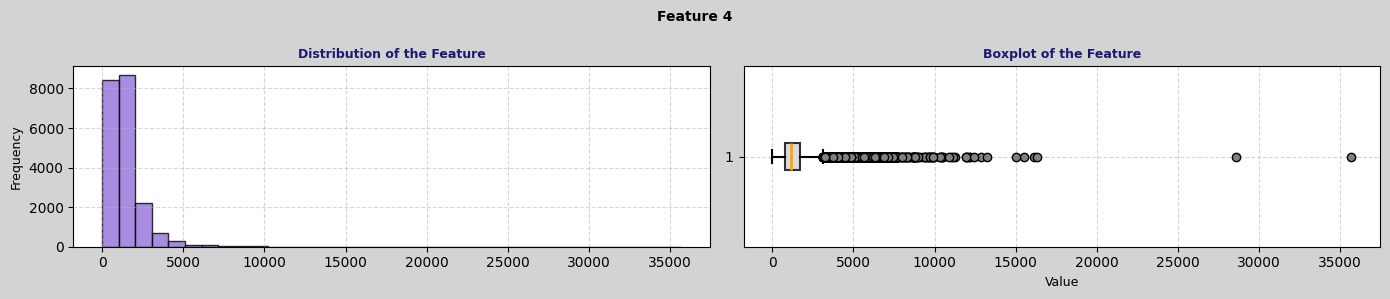

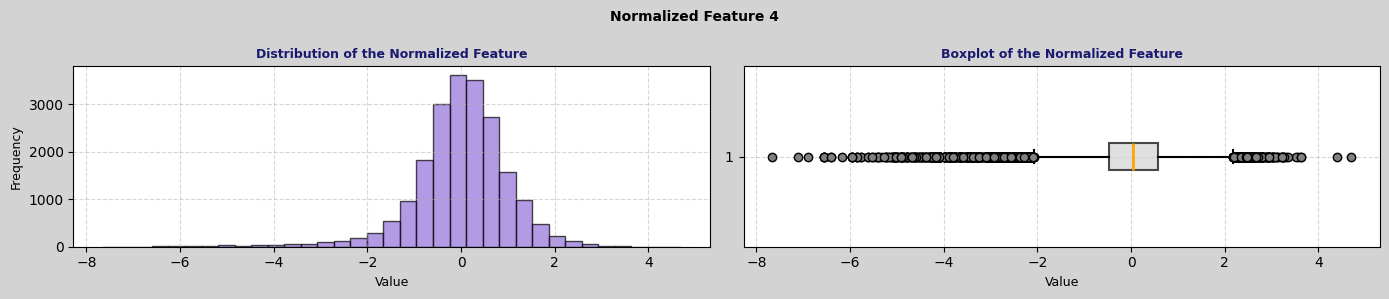

In [22]:
# Plotting the Feature before Normalization
plot_feature(feature=X[:, n], feature_number=n)
# Plotting the Feature after Log Transformation and Standardization
plot_normalized_feature(normalized_feature=feature_standardized, feature_number=n)

##### **Feature 5**

In [23]:
n = 5
feature_info(feature_index=n)

Number of observations in the Feature: 20640
Data type of the Feature: float64
Maximum value: 1243.33
Minimum value: 0.69
Mean: 3.07
Median: 2.82
Standard Deviation: 10.39


In [24]:
# Apply log(x + 1) transformation
log_transformer = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)
feature_log_transformed = log_transformer.transform(X[:, n].reshape(-1, 1))

# Standardize the feature
standardize = StandardScaler()
feature_standardized = standardize.fit_transform(feature_log_transformed)

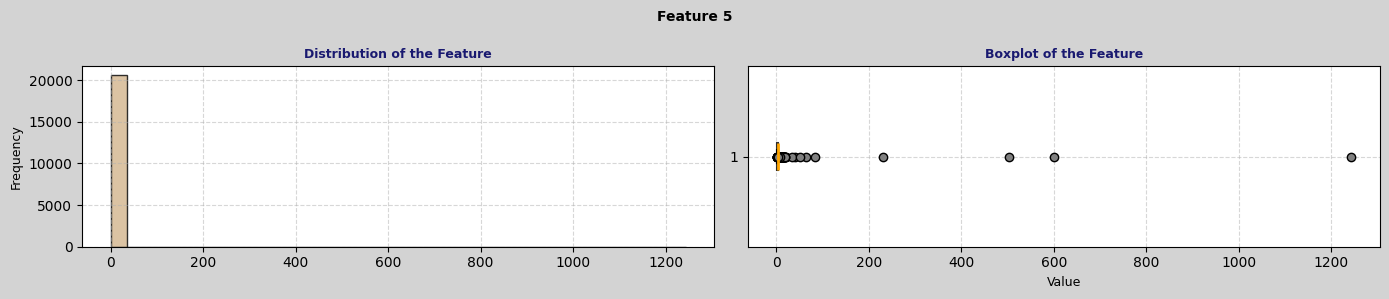

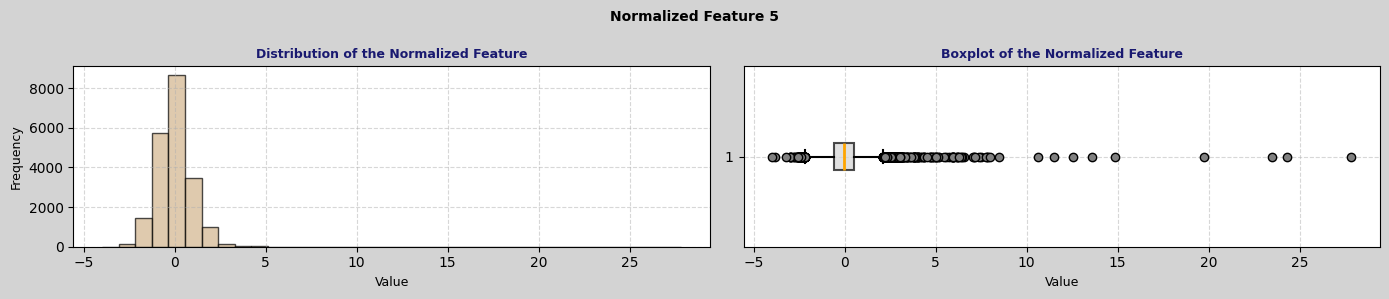

In [25]:
# Plotting the Feature before Normalization
plot_feature(feature=X[:, n], feature_number=n)
# Plotting the Feature after Log Transformation and Standardization
plot_normalized_feature(normalized_feature=feature_standardized, feature_number=n)

##### **Feature 6**

In [26]:
n = 6
feature_info(feature_index=n)

Number of observations in the Feature: 20640
Data type of the Feature: float64
Maximum value: 41.95
Minimum value: 32.54
Mean: 35.63
Median: 34.26
Standard Deviation: 2.14


In [27]:
# Apply log(x + 1) transformation
log_transformer = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)
feature_log_transformed = log_transformer.transform(X[:, n].reshape(-1, 1))

# Standardize the feature
standardize = StandardScaler()
feature_standardized = standardize.fit_transform(feature_log_transformed)

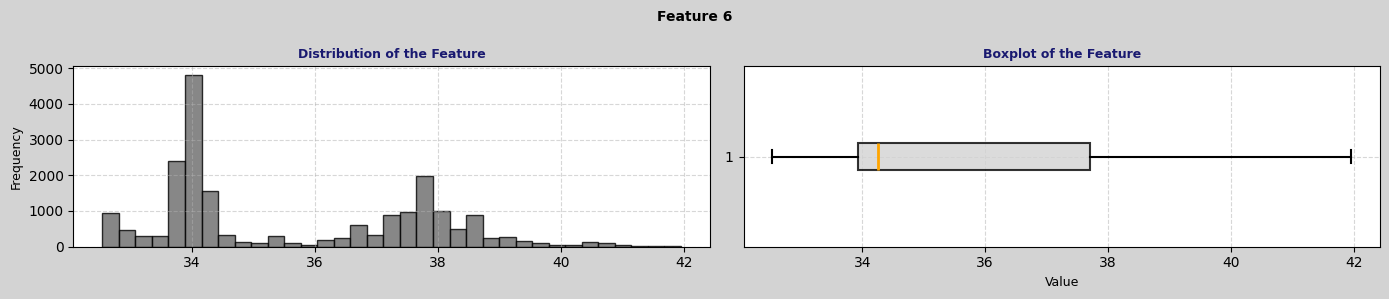

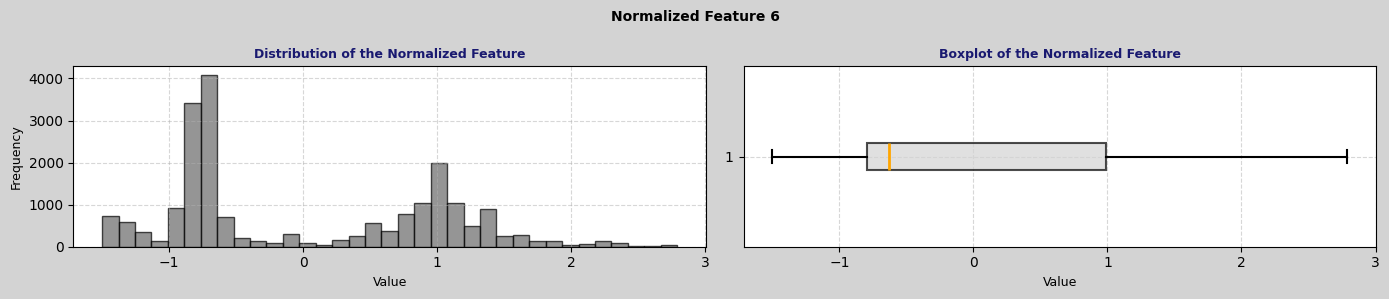

In [28]:
# Plotting the Feature before Normalization
plot_feature(feature=X[:, n], feature_number=n)
# Plotting the Feature after Log Transformation and Standardization
plot_normalized_feature(normalized_feature=feature_standardized, feature_number=n)

##### **Feature 7**

In [29]:
n = 7
feature_info(feature_index=n)

Number of observations in the Feature: 20640
Data type of the Feature: float64
Maximum value: -114.31
Minimum value: -124.35
Mean: -119.57
Median: -118.49
Standard Deviation: 2.00


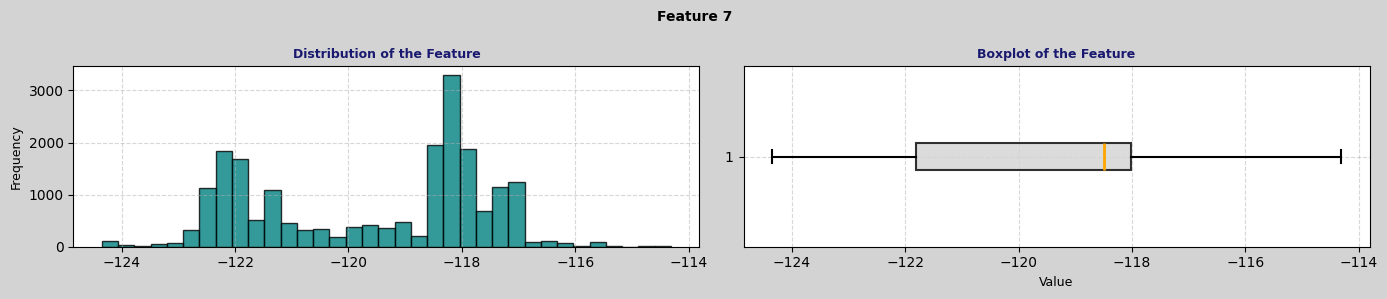

In [30]:
# Plotting the Feature before Normalization
plot_feature(feature=X[:, n], feature_number=n)

In [31]:
# Define the shifting function
def shift_data(x):
    min_value = np.min(x)
    shifted_data = x + np.abs(min_value) + 1  
    return shifted_data

# Apply the transformation
shifting_transformer = FunctionTransformer(func=shift_data)
shifted_feature = shifting_transformer.fit_transform(X[:, 7].reshape(-1, 1))

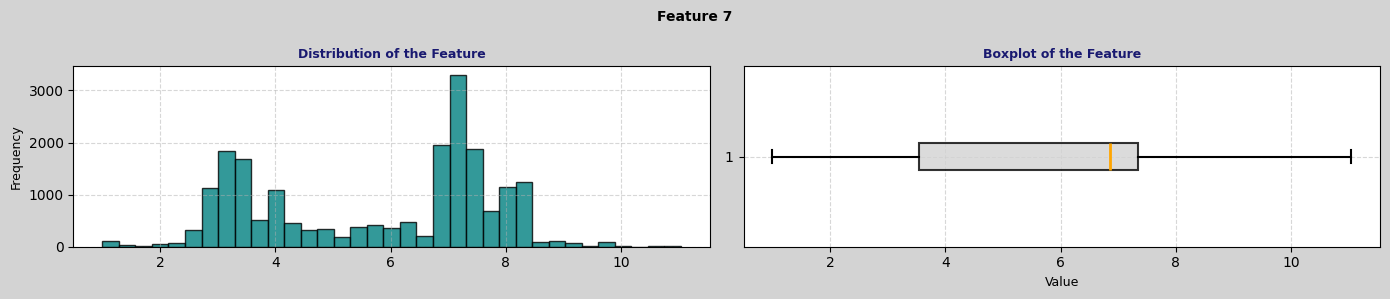

In [32]:
# Plotting the Feature before Normalization
plot_feature(feature=shifted_feature, feature_number=n)

In [33]:
# Apply log(x + 1) transformation
log_transformer = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)
feature_log_transformed = log_transformer.transform(shifted_feature)

# Standardize the feature
standardize = StandardScaler()
feature_standardized = standardize.fit_transform(feature_log_transformed)

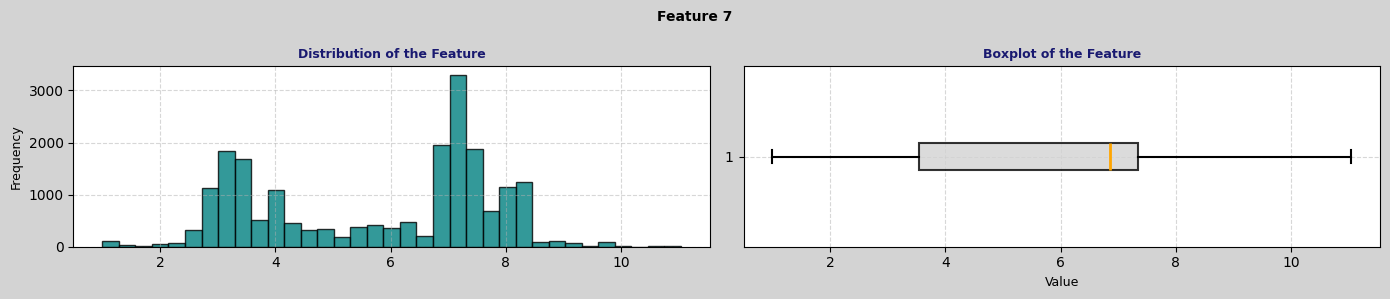

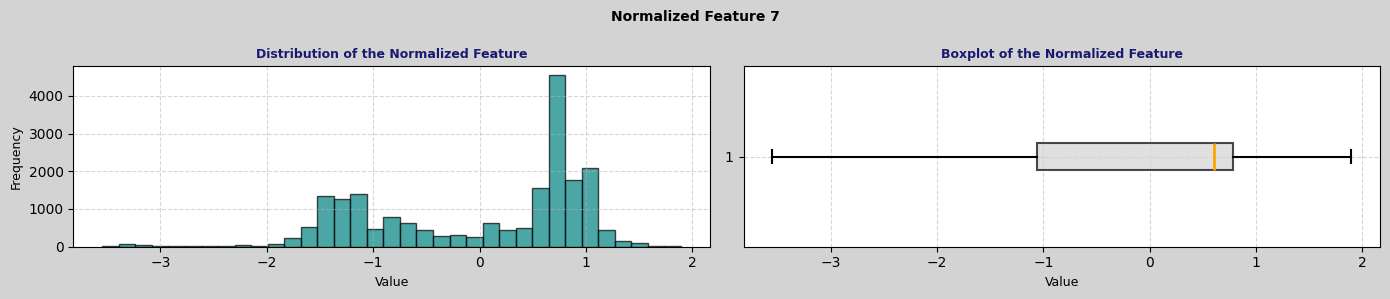

In [34]:
# Plotting the Feature before Normalization
plot_feature(feature=shifted_feature, feature_number=n)
# Plotting the Feature after Log Transformation and Standardization
plot_normalized_feature(normalized_feature=feature_standardized, feature_number=n)